In [1]:
import fastai

ModuleNotFoundError: No module named 'fastai'

In [2]:
from fastai.vision.all import *
import zipfile
from pathlib import Path
from shutil import copyfile

ModuleNotFoundError: No module named 'fastai'

In [2]:
# Upload a new zipped batch
# Unzip it

# with zipfile.ZipFile('data/uploads/2020-08-29.zip', 'r') as zip_ref:
#     zip_ref.extractall('data/training_images/')

In [3]:
rugs = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'\d{5}-\d{4}_\d\d-(.+).jpe?g$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=336))
rugs

In [ ]:
path = Path('data/training_images')
dls = rugs.dataloaders(path,bs=8)
dls,len(path.ls())

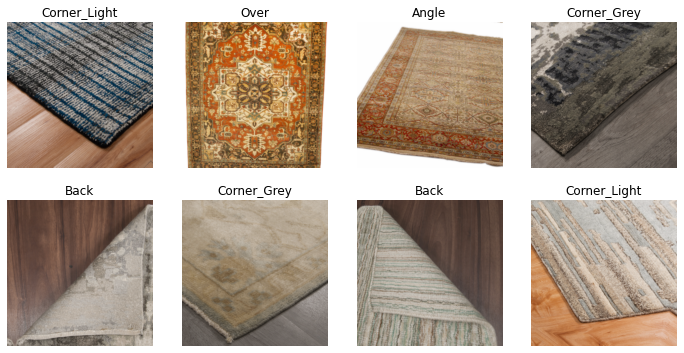

In [5]:
dls.show_batch(max_n=16)

In [6]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.110216,0.514748,0.160494,02:10


epoch,train_loss,valid_loss,error_rate,time
0,0.663787,0.156786,0.061728,02:40
1,0.475769,0.039710,0.024691,02:40
2,0.287316,0.029205,0.012346,02:38
3,0.176537,0.023645,0.012346,02:36


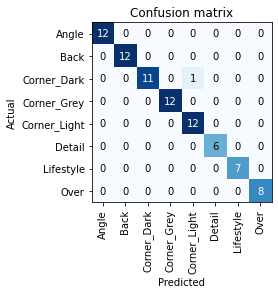

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


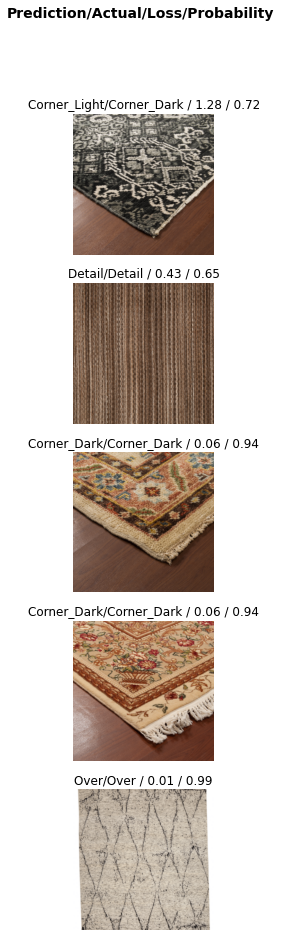

In [8]:
interp.plot_top_losses(5, nrows=5)

In [9]:
learn.export('models/rug-classifier-model-sep-07-2020.pkl') 


In [10]:
root_path = Path()
models_path = Path('models/')
root_path.ls(file_exts='.pkl')

(#0) []

In [11]:
learner = load_learner(root_path/'models/rug-classifier-model-sep-03-2020.pkl')
learner

In [19]:
print(learner.dls.vocab)
learner,learner.predict('data/test_images/07119-0003_02-Angle.tif') # insert test image here from unclassified group


(#8) ['Angle','Back','Corner_Dark','Corner_Grey','Corner_Light','Detail','Lifestyle','Over']


(<fastai.learner.Learner at 0x7f5c5fcba4d0>,
 ('Angle',
  tensor(0),
  tensor([1.0000e+00, 4.1626e-08, 9.4731e-10, 1.9935e-08, 5.2468e-09, 8.9603e-08,
          6.6003e-07, 1.3318e-07])))